<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/Polynomial_Regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [2]:
# generate X and Y

X = 6 * np.random.randn(100,1) - 3

# quadratic equation for y
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)  # 0.5x^2 + 1.5x + 2 + noise

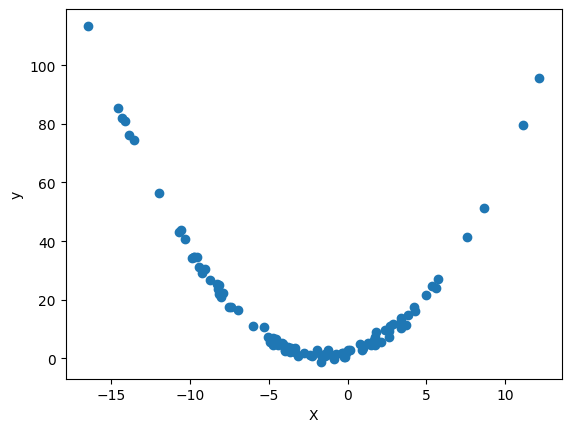

In [3]:
# plot the data on scatter plot

plt.scatter(X[:,0],y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
# do train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,X_test.shape

((80, 1), (20, 1))

## Linear Regression

In [5]:
# implement linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr = LinearRegression()

# fit the model on training data
lr.fit(X_train,y_train)

# predict on the test data
y_pred = lr.predict(X_test)

# get the r2 scores
score = r2_score(y_test,y_pred)

# get the MSE
mse = mean_squared_error(y_test,y_pred)

print(f'The r2 score for linear regression is {score} with the avg error of {np.round(mse,2)}')


The r2 score for linear regression is 0.26031127526103937 with the avg error of 477.36


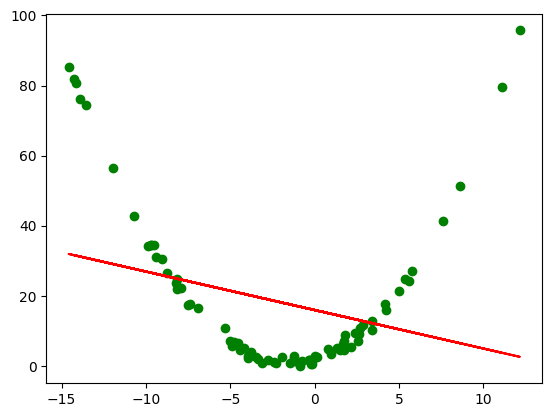

In [6]:
# plot the regression line

plt.plot(np.sort(X_train),lr.predict(np.sort(X_train)),color='red')
plt.scatter(X_train,y_train,c='green')
plt.show()

## Polynomial Regression

In [7]:
# create polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_poly = poly.fit_transform(X_train)

# transform the X_test
X_test_poly = poly.transform(X_test)

In [8]:
X_train_poly[:5]

array([[ 1.        , -3.13788038,  9.84629327],
       [ 1.        , -4.91214586, 24.12917693],
       [ 1.        ,  2.60372076,  6.77936182],
       [ 1.        , -9.72288842, 94.53455929],
       [ 1.        , -6.9411078 , 48.17897745]])

In [9]:
lr_poly = LinearRegression()

# fit the model on training data
lr_poly.fit(X_train_poly,y_train)

# predict on the test data
y_pred = lr_poly.predict(X_test_poly)

# get the r2 scores
score = r2_score(y_test,y_pred)

# get the MSE
mse = mean_squared_error(y_test,y_pred)

print(f'The r2 score for linear regression is {score} with the avg error of {np.round(mse,2)}')


The r2 score for linear regression is 0.9974688844933715 with the avg error of 1.63


In [10]:
# coefficient values

print('The coefficients are: ',lr_poly.coef_,sep='\n')

# intercept value

print('The intercept value is are:',lr_poly.intercept_[0],sep='\n')

The coefficients are: 
[[0.         1.48554299 0.49774149]]
The intercept value is are:
2.0522524383212044


The population equation is
$$0.5x^2 + 1.5x + 2x^0$$

where $x^0 = 1$

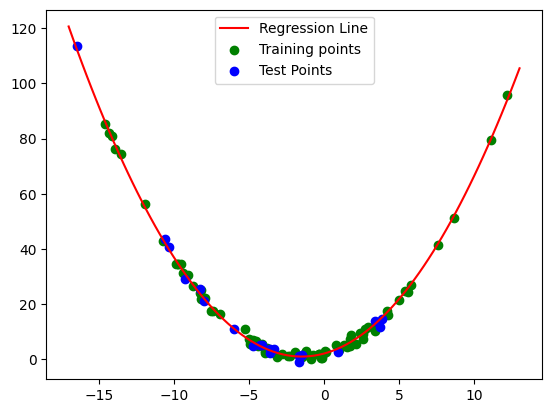

In [11]:
# plot the regression line after polynomial transformation

X_test_temp = np.linspace(-17,13,100)

plt.plot(X_test_temp,lr_poly.predict(poly.transform(X_test_temp.reshape(-1,1))),color='red',label='Regression Line')
plt.scatter(X_train,y_train,c='green',label='Training points')
plt.scatter(X_test,y_test,c='blue',label='Test Points')
plt.legend()
plt.show()


### Polynomial Regression for different values of degrees

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
def polynomial(degree):

    poly = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()

    # create pipeline
    poly_pipe = Pipeline(steps=[
        ('polynomial',poly),
        ('regressor',lin_reg)
    ])

    # fit on the training data
    poly_pipe.fit(X_train,y_train)

    # predict on the test data
    y_pred = poly_pipe.predict(X_test)

    # r2 score
    score = r2_score(y_test,y_pred)
    print('The r2 score is ',score)
    # get the model paramters

    # coefficient values
    print('The coefficients are: ',poly_pipe['regressor'].coef_,sep='\n')

    # intercept value
    print('The intercept value is are:',poly_pipe['regressor'].intercept_[0],sep='\n')

    # plot the regression line on data

    X_test_temp = np.linspace(-17,13,100) #create synthetic data for plotting

    plt.plot(X_test_temp,poly_pipe.predict(X_test_temp.reshape(-1,1)),color='red',label='Regression Line')
    plt.scatter(X_train,y_train,c='green',label='Training points',s=20)
    plt.scatter(X_test,y_test,c='blue',label='Test Points',s=20)
    plt.ylim((0,60))
    plt.legend()
    plt.show()

The r2 score is  0.9973083754886845
The coefficients are: 
[[0.00000000e+00 1.44181580e+00 5.00441460e-01 5.07629411e-04]]
The intercept value is are:
1.9791051403129956


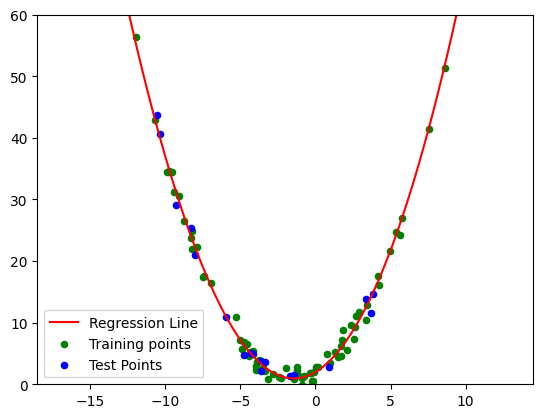

In [14]:
# plot for degre 3

polynomial(degree=3)

The r2 score is  0.9920012021128158
The coefficients are: 
[[ 0.00000000e+00  1.43729366e+00  4.89059732e-01  9.70147816e-04
  -8.09540805e-05 -2.54124233e-05  1.31782094e-06  1.61068651e-07]]
The intercept value is are:
2.135813997916575


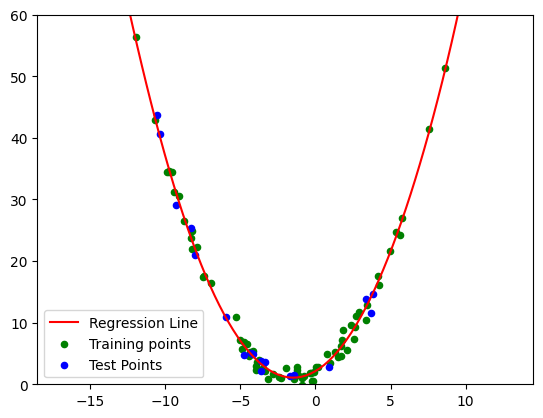

In [15]:
# plot for degre 7

polynomial(degree=7)

The r2 score is  0.9814416993645992
The coefficients are: 
[[ 0.00000000e+00  1.52926585e+00  4.72277825e-01 -9.20816691e-03
   4.54690698e-04  2.46699075e-04 -1.51492561e-07 -2.39610027e-06
  -4.93345131e-08  7.82065024e-09  2.71059841e-10]]
The intercept value is are:
2.1875357016041903


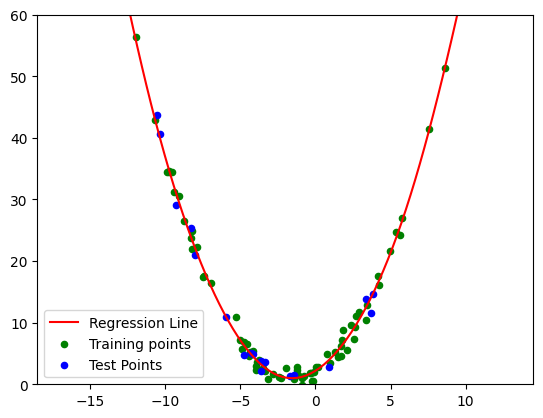

In [16]:
# plot for degre 10

polynomial(degree=10)

**As the polynomial degrees start to increase, the model starts to overfit the training data and the accuracy on the new dataset reduces**